<a href="https://colab.research.google.com/github/vthamada/TelecomX_parte2/blob/main/TelecomX_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠️ Preparação dos Dados

## Extração do Arquivo Tratado

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/vthamada/TelecomX_parte2/refs/heads/main/dados_tratados.csv')

In [3]:
dados.head()

,customerID,evadiu,genero,idoso,tem_parceiro,tem_dependentes,tempo_meses,servico_telefone,multiplas_linhas,tipo_internet,...,tv_streaming,filmes_streaming,tipo_contrato,fatura_online,forma_pagamento,conta_mensal,conta_total,conta_diaria,tem_internet,qtd_servicos
0,0002-ORFBO,0,feminino,0,1,1,9,1,0,dsl,...,1,0,anual,1,boleto,65.6,593.30,2.19,1,5
1,0003-MKNFE,0,masculino,0,0,0,9,1,1,dsl,...,0,1,mensal,0,boleto,59.9,542.40,2.00,1,4
2,0004-TLHLJ,1,masculino,0,0,0,4,1,0,fibra óptica,...,0,0,mensal,1,débito online,73.9,280.85,2.46,1,3
3,0011-IGKFF,1,masculino,1,1,0,13,1,0,fibra óptica,...,1,1,mensal,1,débito online,98.0,1237.85,3.27,1,6
4,0013-EXCHZ,1,feminino,1,1,0,3,1,0,fibra óptica,...,1,0,mensal,1,boleto,83.9,267.40,2.80,1,4


## Remoção de Colunas Irrelevantes

In [4]:
dados.drop('customerID', axis=1, inplace=True)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   evadiu                7043 non-null   int64  
 1   genero                7043 non-null   object 
 2   idoso                 7043 non-null   int64  
 3   tem_parceiro          7043 non-null   int64  
 4   tem_dependentes       7043 non-null   int64  
 5   tempo_meses           7043 non-null   int64  
 6   servico_telefone      7043 non-null   int64  
 7   multiplas_linhas      7043 non-null   int64  
 8   tipo_internet         7043 non-null   object 
 9   seguranca_online      7043 non-null   int64  
 10  backup_online         7043 non-null   int64  
 11  protecao_dispositivo  7043 non-null   int64  
 12  suporte_tecnico       7043 non-null   int64  
 13  tv_streaming          7043 non-null   int64  
 14  filmes_streaming      7043 non-null   int64  
 15  tipo_contrato        

## Encoding

In [6]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [7]:
X = dados.drop('evadiu', axis=1)
y = dados['evadiu']

In [8]:
colunas_categoricas = ['genero', 'tipo_internet', 'tipo_contrato', 'forma_pagamento']

In [9]:
one_hot = make_column_transformer(
    (OneHotEncoder(drop='first'), colunas_categoricas),
    remainder='passthrough'
)

In [10]:
X = one_hot.fit_transform(X)

colunas = one_hot.get_feature_names_out()

X = pd.DataFrame(X, columns=colunas, index=dados.index)

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   onehotencoder__genero_masculino                            7043 non-null   float64
 1   onehotencoder__tipo_internet_fibra óptica                  7043 non-null   float64
 2   onehotencoder__tipo_internet_não                           7043 non-null   float64
 3   onehotencoder__tipo_contrato_bienal                        7043 non-null   float64
 4   onehotencoder__tipo_contrato_mensal                        7043 non-null   float64
 5   onehotencoder__forma_pagamento_cartão (automático)         7043 non-null   float64
 6   onehotencoder__forma_pagamento_débito online               7043 non-null   float64
 7   onehotencoder__forma_pagamento_transferência (automática)  7043 non-null   float64
 8   remainde

## Verificação da Proporção de Evasão

In [12]:
y.value_counts(normalize=True)

,proportion
evadiu,
0,0.73463
1,0.26537


# 🎯 Correlação e Seleção de Variáveis

## Análise de Correlação

In [13]:
corr = dados.corr(numeric_only=True)['evadiu'].sort_values(ascending=False)
print(corr)

evadiu                  1.000000
conta_diaria            0.193412
conta_mensal            0.193356
fatura_online           0.191825
idoso                   0.150889
tv_streaming            0.063228
filmes_streaming        0.061382
multiplas_linhas        0.040102
servico_telefone        0.011942
protecao_dispositivo   -0.066160
qtd_servicos           -0.067264
backup_online          -0.082255
tem_parceiro           -0.150448
tem_dependentes        -0.164221
suporte_tecnico        -0.164674
seguranca_online       -0.171226
conta_total            -0.198324
tempo_meses            -0.352229
tem_internet                 NaN
Name: evadiu, dtype: float64


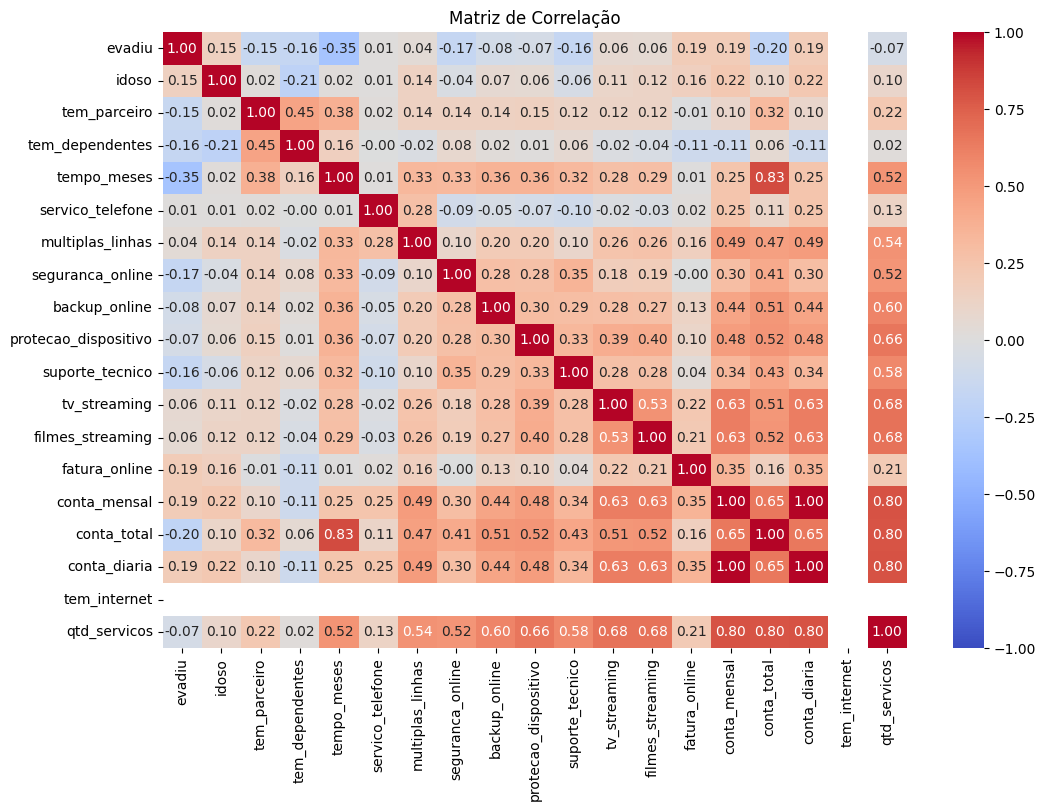

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de correlação só para as colunas numéricas
corr_matrix = dados.corr(numeric_only=True)

# Gráfico de calor da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

## Análises Direcionadas

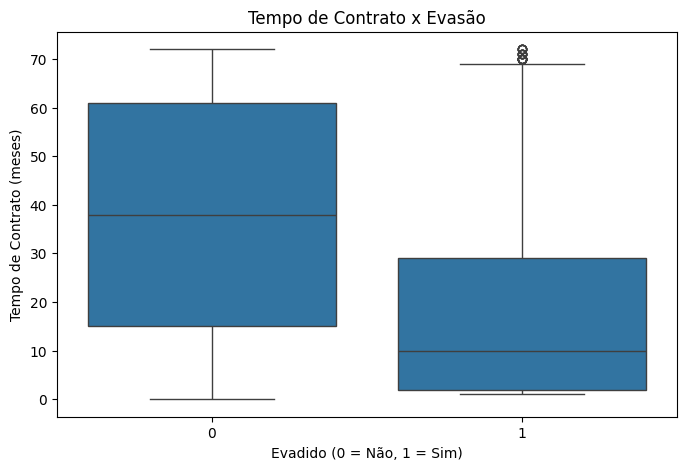

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='evadiu', y='tempo_meses', data=dados)
plt.title('Tempo de Contrato x Evasão')
plt.xlabel('Evadido (0 = Não, 1 = Sim)')
plt.ylabel('Tempo de Contrato (meses)')
plt.show()

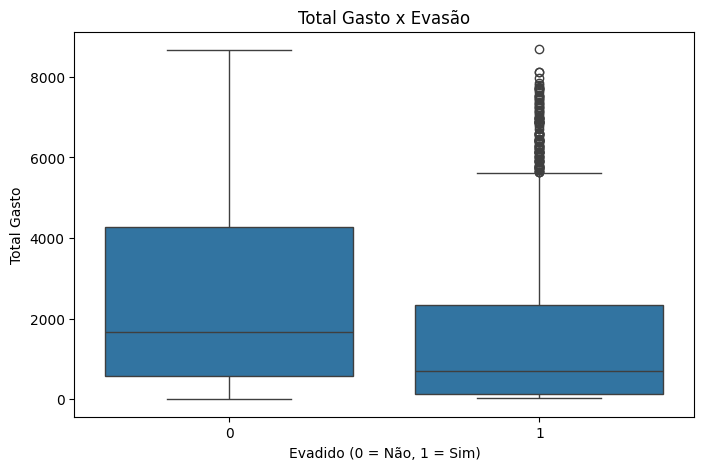

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='evadiu', y='conta_total', data=dados)
plt.title('Total Gasto x Evasão')
plt.xlabel('Evadido (0 = Não, 1 = Sim)')
plt.ylabel('Total Gasto')
plt.show()

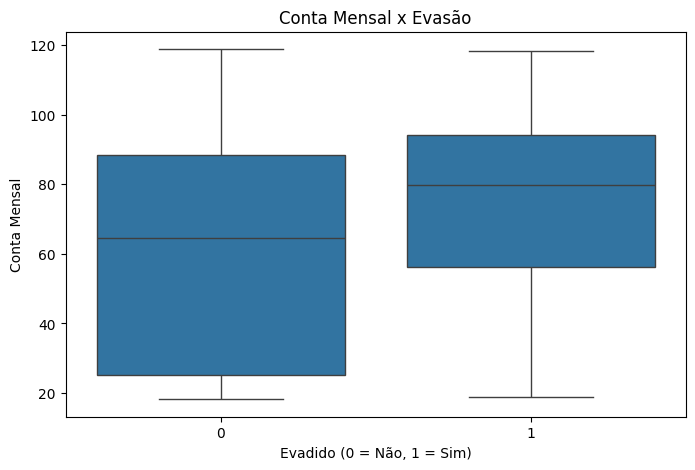

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='evadiu', y='conta_mensal', data=dados)
plt.title('Conta Mensal x Evasão')
plt.xlabel('Evadido (0 = Não, 1 = Sim)')
plt.ylabel('Conta Mensal')
plt.show()

# 🤖 Modelagem Preditiva

## Separação de Dados

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [19]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Verificação do balanceamento
print("Distribuição original:", Counter(y_train))

Distribuição original: Counter({0: 3622, 1: 1308})


In [20]:
smote = SMOTE(random_state=42)
X_res_smote, y_res_smote = smote.fit_resample(X_train, y_train)
print("Após SMOTE:", Counter(y_res_smote))

Após SMOTE: Counter({0: 3622, 1: 3622})


In [21]:
smote_tomek = SMOTETomek(random_state=42)
X_res_smtk, y_res_smtk = smote_tomek.fit_resample(X_train, y_train)
print("Após SMOTE + TomekLinks:", Counter(y_res_smtk))

Após SMOTE + TomekLinks: Counter({0: 3296, 1: 3296})


## Criação de Modelos

### Pipeline para Regressão Logística

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Criação do pipeline
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

# Treinando o modelo
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(random_state=42))])

In [23]:
y_pred_lr = pipeline_lr.predict(X_test)

### Pipeline para Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Criação do pipeline
pipeline_rf = Pipeline([
    ('rf', RandomForestClassifier(random_state=42))
])

# Treinando o modelo
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('rf', RandomForestClassifier(random_state=42))])

In [25]:
y_pred_rf = pipeline_rf.predict(X_test)

### Pipeline para XGBoost

In [26]:
from xgboost import XGBClassifier

# Criação do pipeline
pipeline_xgb = Pipeline([
    ('xgb', XGBClassifier(random_state=42, eval_metric='logloss'))
])

# Treinando o modelo
pipeline_xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:47:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [27]:
y_pred_xgb = pipeline_xgb.predict(X_test)

## Avaliação dos Modelos

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Avaliação Regressão Logística

#### Avaliação de Treino

In [29]:
y_train_pred_lr = pipeline_lr.predict(X_train)
print(classification_report(y_train, y_train_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      3622
           1       0.67      0.56      0.61      1308

    accuracy                           0.81      4930
   macro avg       0.76      0.73      0.74      4930
weighted avg       0.80      0.81      0.81      4930



#### Avaliação de Teste

In [30]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



#### Matriz de Confusão Regressão Logística

In [31]:
print(confusion_matrix(y_test, y_pred_lr))

[[1381  171]
 [ 255  306]]


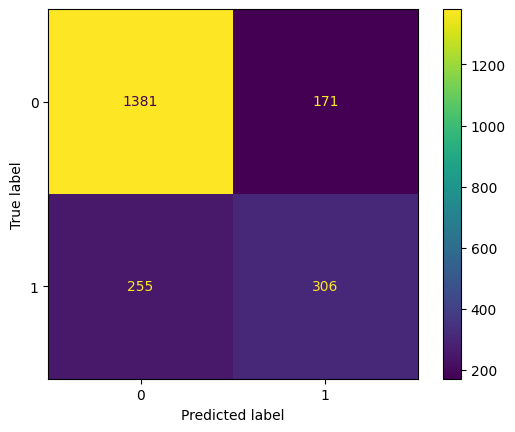

In [32]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot()

### Avaliação Random Forest

#### Avaliação de Treino

In [33]:
y_train_pred_rf = pipeline_rf.predict(X_train)
print(classification_report(y_train, y_train_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3622
           1       1.00      1.00      1.00      1308

    accuracy                           1.00      4930
   macro avg       1.00      1.00      1.00      4930
weighted avg       1.00      1.00      1.00      4930



#### Avaliação de Teste

In [34]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.51      0.56       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



#### Matriz de Random Forest

In [35]:
print(confusion_matrix(y_test, y_pred_rf))

[[1377  175]
 [ 277  284]]


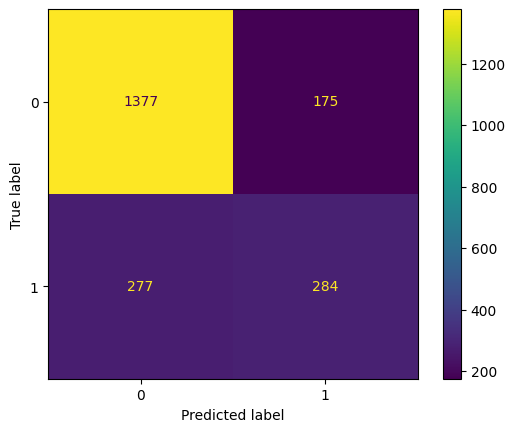

In [36]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()

### Avaliação XGBoost

#### Avaliação de Treino

In [37]:
y_train_pred_xgb = pipeline_xgb.predict(X_train)
print(classification_report(y_train, y_train_pred_xgb))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3622
           1       0.91      0.86      0.88      1308

    accuracy                           0.94      4930
   macro avg       0.93      0.91      0.92      4930
weighted avg       0.94      0.94      0.94      4930



#### Avaliação de Teste

In [38]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1552
           1       0.60      0.52      0.55       561

    accuracy                           0.78      2113
   macro avg       0.72      0.70      0.70      2113
weighted avg       0.77      0.78      0.77      2113



#### Matriz de Confusão XGBoost

In [39]:
print(confusion_matrix(y_test, y_pred_xgb))

[[1357  195]
 [ 271  290]]


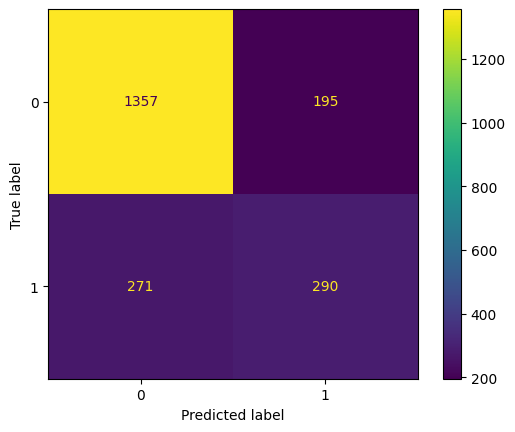

In [40]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot()

## Balanceamento e Ajuste de Hiperparâmetros

### Modelo Regressão Logística

In [41]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import TomekLinks

In [42]:
# Pipeline com StandardScaler, SMOTE e Regressão Logística
pipeline_lr = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('tomek', TomekLinks()),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(class_weight='balanced', random_state=42))
])

In [43]:
# Grade de hiperparâmetros
param_grid_lr = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['saga'],
    'logreg__penalty': ['l2', 'elasticnet'],
    'logreg__l1_ratio': [0.5, 0.7, 1],
    'logreg__max_iter': [100, 200, 300]
}

In [44]:
# GridSearchCV com validação cruzada
grid_lr = GridSearchCV(
    pipeline_lr,
    param_grid_lr,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [45]:
# Treinando com dados de treino
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('tomek', TomekLinks()),
                                       ('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100],
                         'logreg__l1_ratio': [0.5, 0.7, 1],
                         'logreg__max_iter': [100, 200, 300],
                         'logreg__penalty': ['l2', 'elasticnet'],
                         'logreg__solver': ['saga']},
             scoring='f1', verbose=2)

In [46]:
# Resultados
print("Melhores hiperparâmetros (LogReg):", grid_lr.best_params_)
print("Melhor score (f1):", grid_lr.best_score_)

Melhores hiperparâmetros (LogReg): {'logreg__C': 1, 'logreg__l1_ratio': 1, 'logreg__max_iter': 100, 'logreg__penalty': 'elasticnet', 'logreg__solver': 'saga'}
Melhor score (f1): 0.6324703291410697


### Avaliação Regressão Logística pós balanceamento

In [47]:
# Predição nos dados de treino
print(classification_report(y_train, grid_lr.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      3622
           1       0.54      0.79      0.64      1308

    accuracy                           0.76      4930
   macro avg       0.72      0.77      0.73      4930
weighted avg       0.81      0.76      0.77      4930



In [48]:
# Predição nos dados de teste
y_pred_lr = grid_lr.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1552
           1       0.52      0.79      0.63       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113



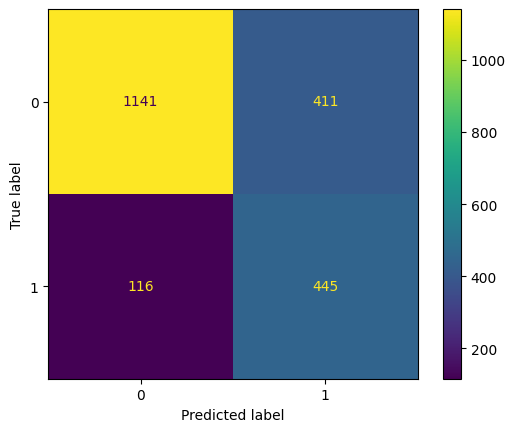

In [50]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot()

### Modelo Random Forest

In [51]:
# Pipeline com SMOTE, Tomek Links e Random Forest
pipeline_rf = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('tomek', TomekLinks()),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

In [52]:
# Grade de hiperparâmetros para ajuste
param_grid_rf = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [3, 5, 10, 20, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

In [53]:
# GridSearchCV com validação cruzada
grid_rf = GridSearchCV(
    pipeline_rf,
    param_grid_rf,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [54]:
# Treinando com dados de treino
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('tomek', TomekLinks()),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [3, 5, 10, 20, None],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

In [55]:
# Resultados
print("Melhores hiperparâmetros:", grid_rf.best_params_)
print("Melhor score (f1):", grid_rf.best_score_)

Melhores hiperparâmetros: {'rf__max_depth': 5, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Melhor score (f1): 0.629105257958022


### Avaliação Random Forest pós balanceamento

In [56]:
# Predição nos dados de treino
print(classification_report(y_train, grid_rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      3622
           1       0.58      0.74      0.65      1308

    accuracy                           0.79      4930
   macro avg       0.74      0.77      0.75      4930
weighted avg       0.81      0.79      0.80      4930



In [57]:
# Predição nos dados de teste
y_pred_rf = grid_rf.predict(X_test)

In [58]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1552
           1       0.55      0.72      0.62       561

    accuracy                           0.77      2113
   macro avg       0.72      0.75      0.73      2113
weighted avg       0.80      0.77      0.78      2113



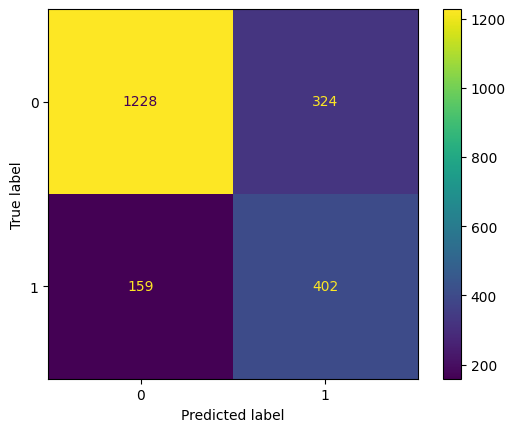

In [59]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()

### Modelo XGBoost

In [60]:
# Pipeline com SMOTE, Tomek Links e XGBoost
pipeline_xgb_bal = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('tomek', TomekLinks()),
    ('xgb', XGBClassifier(random_state=42, eval_metric='logloss'))
])

In [61]:
# Grade de hiperparâmetros para ajuste
param_grid_xgb = {
    'xgb__n_estimators': [100, 200, 300, 400, 500],
    'xgb__max_depth': [3, 5, 7, 10, 15],
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0],
}

In [62]:
# GridSearchCV com validação cruzada
grid_xgb = GridSearchCV(
    pipeline_xgb,
    param_grid_xgb,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [63]:
# Treinando com dados de treino
grid_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:27:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric='logloss',
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constrai...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'xgb__colsample_bytree': [0.8, 1.0],
                         'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'xgb__max_depth': [3, 5, 7, 10, 15],
                         'xgb__n_estimators': [100, 200, 300, 400, 500],
                         'xgb__subsample': [0.8, 1.0]},
             scoring='f1', verbose=2)

In [64]:
# Resultados
print("Melhores hiperparâmetros:", grid_xgb.best_params_)
print("Melhor score (f1):", grid_xgb.best_score_)

Melhores hiperparâmetros: {'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 5, 'xgb__n_estimators': 500, 'xgb__subsample': 1.0}
Melhor score (f1): 0.5918059833230368


### Avaliação XGBoost pós balanceamento

In [65]:
# Predição nos dados de treino
print(classification_report(y_train, grid_xgb.predict(X_train)))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      3622
           1       0.73      0.61      0.66      1308

    accuracy                           0.84      4930
   macro avg       0.80      0.76      0.78      4930
weighted avg       0.83      0.84      0.83      4930



In [66]:
# Predição nos dados de teste
y_pred_xgb = grid_xgb.predict(X_test)

In [67]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.54      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



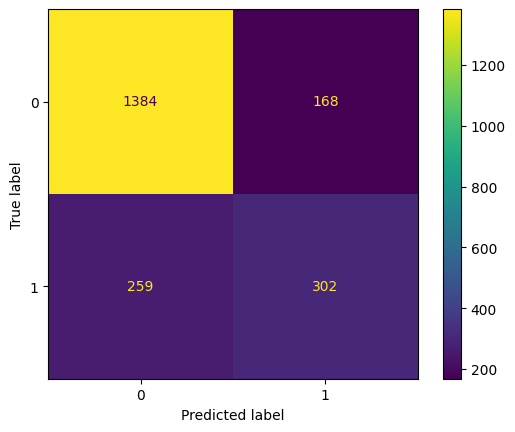

In [68]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot()